# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:
https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the dataset
df = pd.read_csv(r"C:\Users\ganes\Desktop\LaunchCode\data-analysis-projects\Final Project\Final project Dataset Youtube subscibers.csv")
# Want to see if the dataframe was properly imported and see what kind of data is stored in each column.

df.head()



,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [23]:
# To get a detailed outlook of the dataset.
#Memory Usage: Useful for understanding the size of your dataset,
#Non-Null Counts: Helps identify missing data, Data Types: Important for data cleaning and preprocessing,
#It is a quick and essential tool when analyzing a data frame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [24]:
# I will run the following code to get some more information about 'category,' which is the most important part of my analysis.
# This will give me unique category names and their counts.

df['category'].unique()


array(['Music', 'Film & Animation', 'Education', 'Shows', nan, 'Gaming',
       'Entertainment', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [25]:
unique_counts = df['category'].value_counts()
print(unique_counts)

category
Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          52
Education                 46
Howto & Style             45
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: count, dtype: int64


In [26]:
# I will run the following code to know if the dataset has missing values.
# I see some null values in 'category'. As required, I will think about what to do with this later in my analysis.

df.isnull()

,rank,Youtuber,subscribers,video views,video count,category,started
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [27]:
# Import libraries needed for visualization.

import matplotlib.pyplot as plt
import seaborn as sns

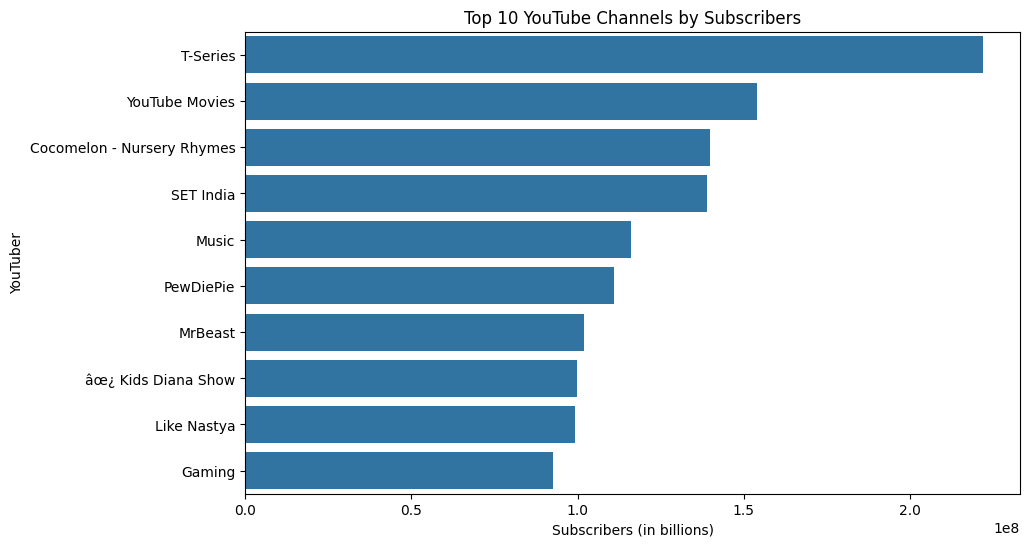

In [28]:
# Convert subscribers to numeric values (removing commas)
df['subscribers'] = df['subscribers'].str.replace(',', '').astype(float)

# Sort the data by subscriber count and get the top 10
top_channels = df.sort_values(by='subscribers', ascending=False).head(10)

# 1.Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='subscribers', y='Youtuber', data=top_channels)
plt.title('Top 10 YouTube Channels by Subscribers')
plt.xlabel('Subscribers (in billions)')
plt.ylabel('YouTuber')
plt.show()
#2. Pie chart for category distribution
#This will show the distribution of YouTube channels across different categories.
category_counts = df['category'].value_counts()


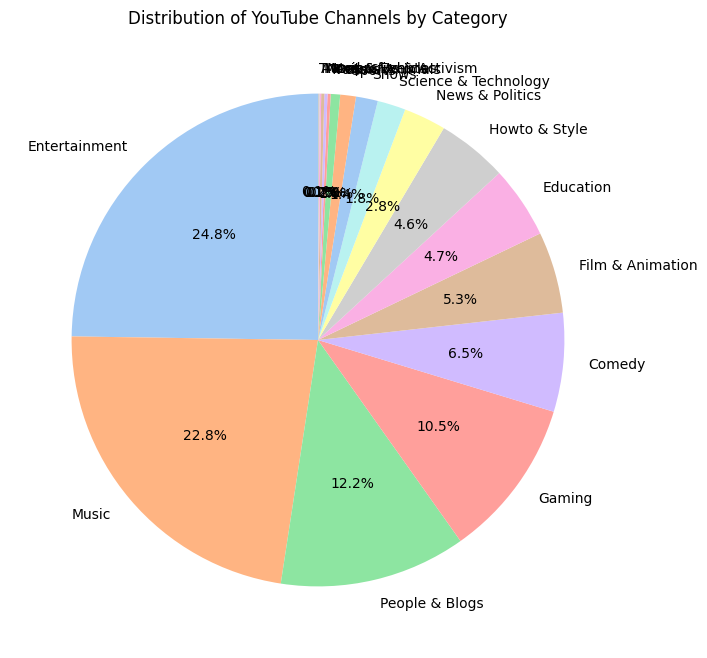

In [29]:
# 2.Plot the pie chart: This pie chart will give an idea about the distribution of YouTube channels by Category.
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of YouTube Channels by Category')
plt.show()

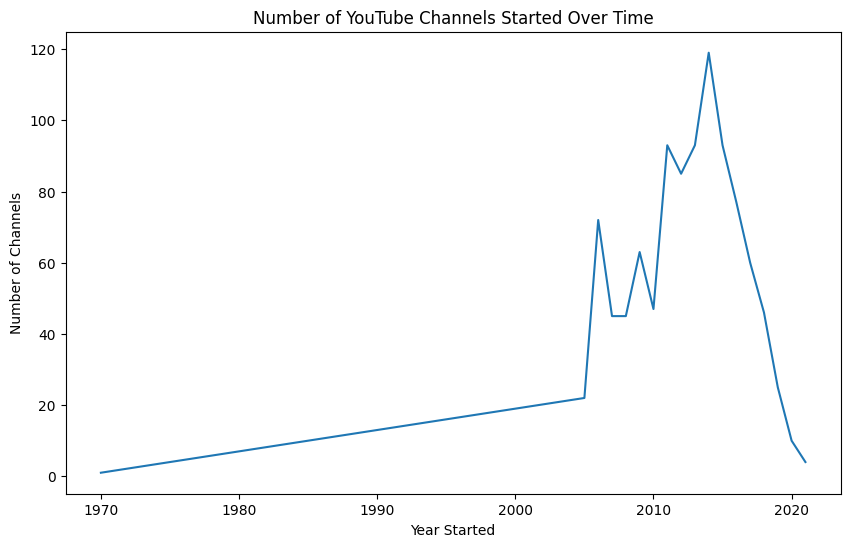

In [30]:
#3. Line graph of the number of channels started every year.
#This graph will show how many YouTube channels started each year.

# Count the number of channels that started in each year
channels_per_year = df['started'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=channels_per_year.index, y=channels_per_year.values)
plt.title('Number of YouTube Channels Started Over Time')
plt.xlabel('Year Started')
plt.ylabel('Number of Channels')
plt.show()

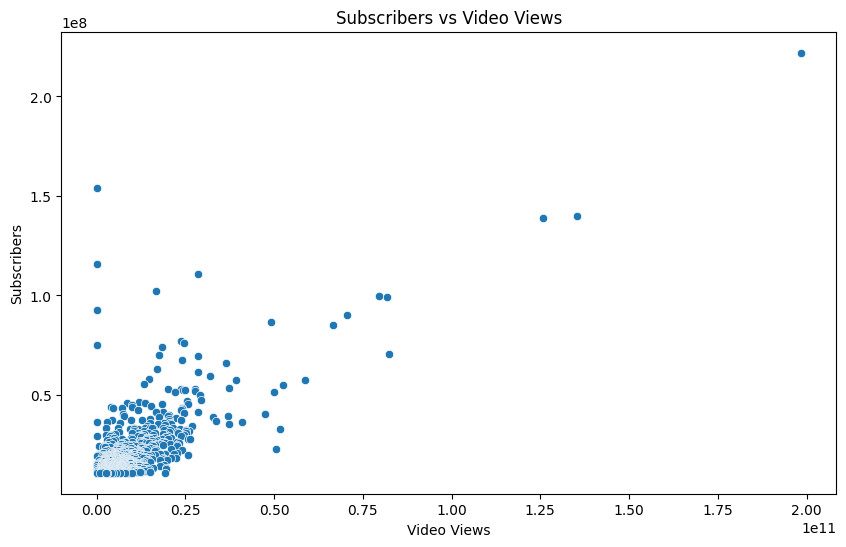

In [31]:
#4. Scatter plot of subscribers vs video views
#This will show the relationship between the number of subscribers and video views.

# Convert video views to numeric values (removing commas)
df['video views'] = df['video views'].str.replace(',', '').astype(float)

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='video views', y='subscribers', data=df)
plt.title('Subscribers vs Video Views')
plt.xlabel('Video Views')
plt.ylabel('Subscribers')
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?                                                                                                Yes.
  Yes.
  a. Empty or Zero Video Views for Popular Channels: Some of the highly ranked channels, like "YouTube Movies" (ranked #2) and "Music" (ranked #5), show 0 video views. This could be surprising, given their large number of subscribers (154M and 116M, respectively). These channels may distribute content in a way that isn't reflected in standard view counts, or there might be a missing value issue in the dataset.
   b.High Subscriber Counts for Niche Channels: Channels like "Cocomelon - Nursery Rhymes" (ranked #3 with 140M subscribers) and "SET India" (ranked #4 with 139M subscribers) cater to niche audiences but have incredibly high subscriber counts. This reflects the global reach of YouTube, especially in non-English-speaking markets and with content for children.                                                                                                c. Large Disparity in Video Count: The number of videos uploaded varies wildly. For example, "T-Series" has over 17,000 videos, whereas "Cocomelon" has only 786 videos but still ranks high in terms of subscribers. This highlights the difference in content strategies across channels—some rely on quantity, while others focus on quality or niche content.

   
2. Do you have any concerns about your dataset?

   yes. Depending on when this dataset was collected, the subscriber counts, video views, and rankings may have shifted. YouTube channels grow and change rapidly, so if the dataset is not recent, it might not reflect current trends.                    Channels with zero video views or video count but large subscribers might indicate special types of channels (e.g., official YouTube content, music playlists, etc.), or there could be errors in data collection.

   
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?                                             yes. Remove or Address Zeros in Critical Columns and handle Missing Categories.